In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
file_path = 'traffic.csv'  # Ensure this matches your file location
df = pd.read_csv(file_path)

In [27]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB
None
          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday

In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()
df['Hour'] = pd.to_datetime(df['Time'], format='mixed', errors='coerce').dt.hour

In [29]:
df['Traffic Situation']

0          low
1          low
2          low
3          low
4       normal
         ...  
2971    normal
2972    normal
2973    normal
2974    normal
2975    normal
Name: Traffic Situation, Length: 2976, dtype: object

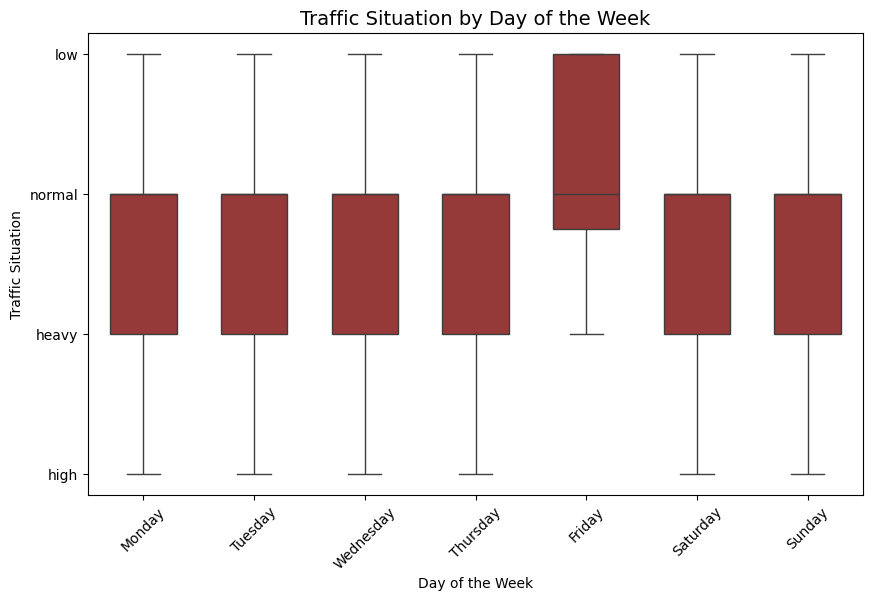

In [30]:
plt.figure(figsize=(10, 6))
# Create the box plot (without alpha)
sns.boxplot(
    x='Day of the week', 
    y='Traffic Situation', 
    data=df, 
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    color='brown', 
    fliersize=3, 
    width=0.6
)

# Titles and Labels
plt.title('Traffic Situation by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Traffic Situation')
plt.xticks(rotation=45)

plt.show()


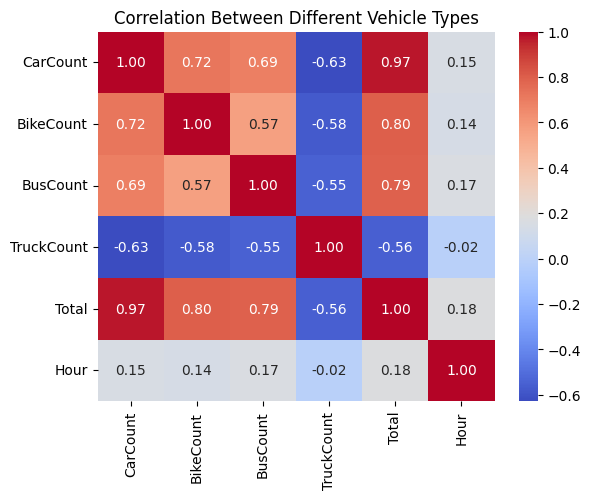

In [31]:
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Different Vehicle Types')
plt.show()


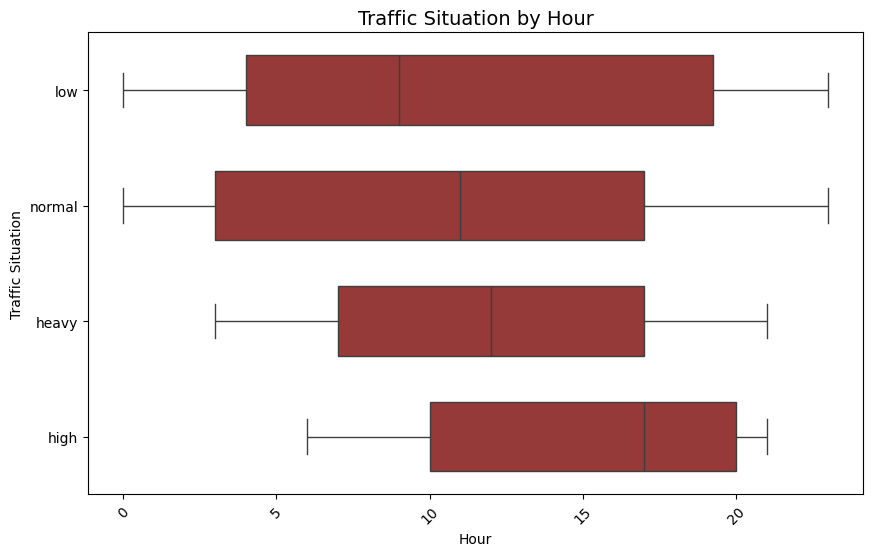

In [32]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    x='Hour', 
    y='Traffic Situation', 
    data=df, 
    color='brown', 
    fliersize=3, 
    width=0.6
)

# Titles and Labels
plt.title('Traffic Situation by Hour', fontsize=14)
plt.xlabel('Hour')
plt.ylabel('Traffic Situation')
plt.xticks(rotation=45)

plt.show()


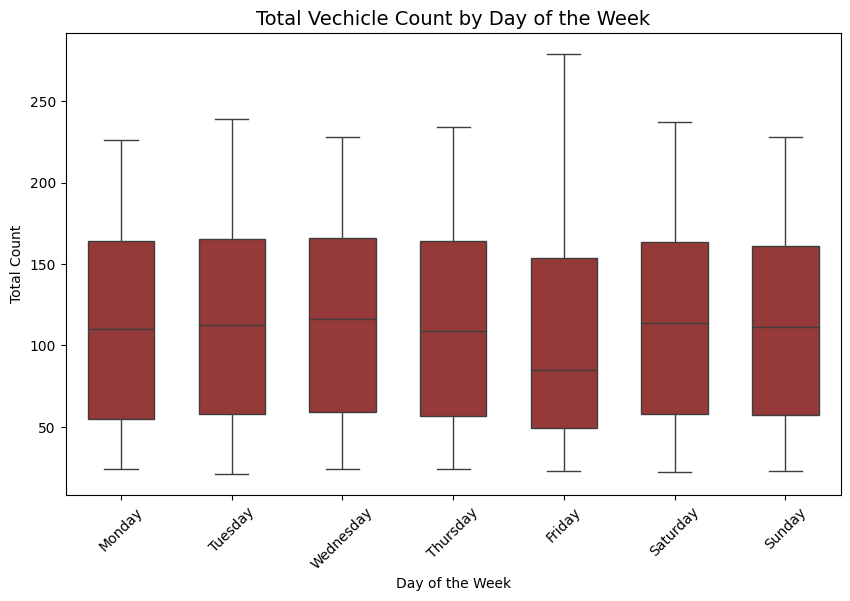

In [33]:
plt.figure(figsize=(10, 6))
# Create the box plot (without alpha)
sns.boxplot(
    x='Day of the week', 
    y='Total', 
    data=df, 
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    color='brown', 
    fliersize=3, 
    width=0.6
)

# Titles and Labels
plt.title('Total Vechicle Count by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Total Count')
plt.xticks(rotation=45)

plt.show()

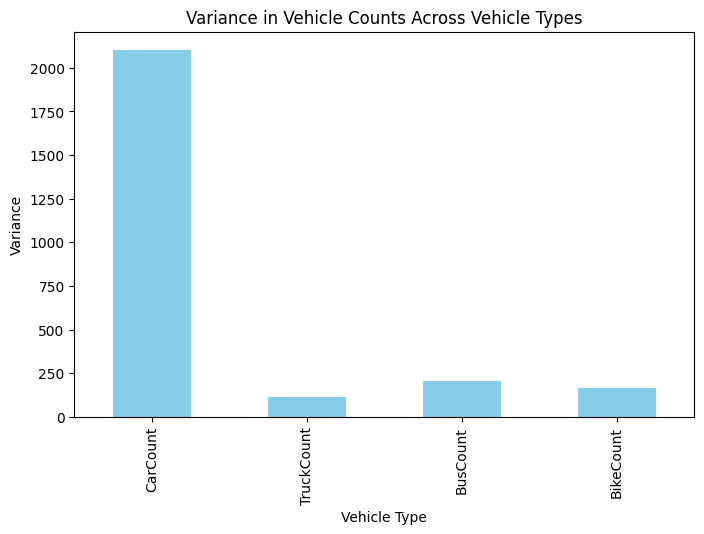

In [34]:
vehicle_columns = ['CarCount', 'TruckCount', 'BusCount', 'BikeCount']  # Adjust column names if necessary
vehicle_variances = df[vehicle_columns].var()

plt.figure(figsize=(8, 5))
vehicle_variances.plot(kind='bar', color='skyblue')
plt.title('Variance in Vehicle Counts Across Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Variance')
plt.show()

<Figure size 1200x600 with 0 Axes>

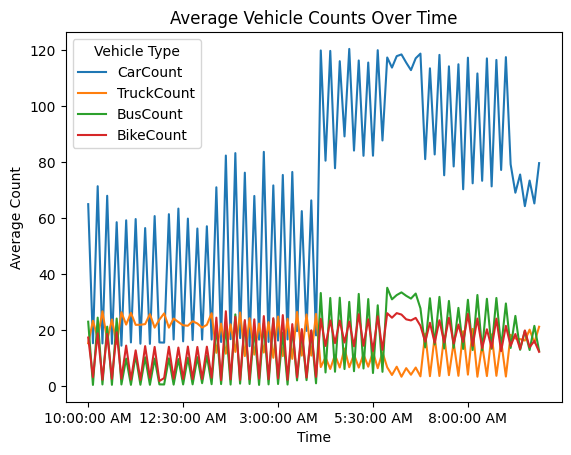

In [35]:
plt.figure(figsize=(12, 6))
df.groupby('Time')[vehicle_columns].mean().plot()
plt.title('Average Vehicle Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Average Count')
plt.legend(title='Vehicle Type')
plt.show()